In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier,MLPRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df=pd.read_csv('/content/forest fire datset - forestfires (1).csv')

In [ ]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,255.1,23.2,51.0,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,126.7,18.6,33.0,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,126.7,19.6,33.0,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,490.0,21.3,97.0,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,790.6,20.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,369.0,27.8,32.0,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,736.3,21.9,71.0,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,500.1,21.2,70.0,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,700.0,25.6,42.0,4.0,0.0,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,695.418665,25.793269,44.198839,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,345.984812,4.220106,16.344334,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,111.220000,11.800000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,453.560000,22.900000,32.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,666.200000,25.320000,41.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,900.000000,29.630000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,1727.770000,33.300000,100.000000,9.400000,6.400000,1090.840000


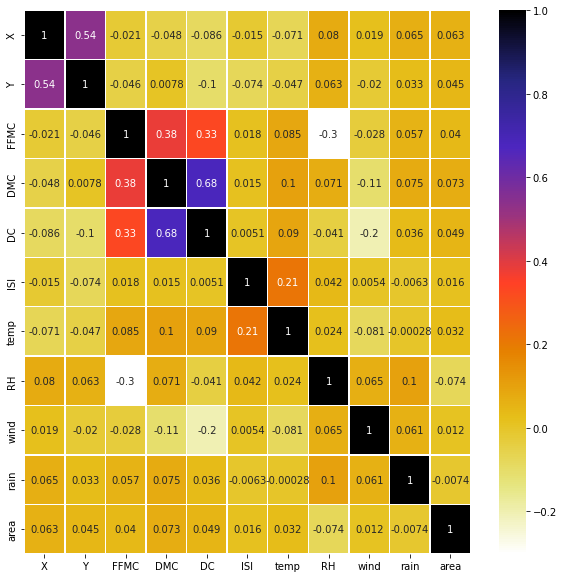

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r ,linewidths=.5)

In [ ]:
def ordinal_encoding(df,column,ordering):
  df=df.copy()
  df[column]=df[column].apply(lambda x: ordering.index(x))
  return df

In [ ]:
def preprocessing(df,task):
  df=df.copy()
  df=ordinal_encoding(
      df,
      column='month',
      ordering=[
                 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'
       ]
  )
  df=ordinal_encoding(
      df,
      column='day',
      ordering=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
  )
  if task=='Regression':
    Y=df['area']
  elif task=='Classification':
    Y=df['area'].apply(lambda x: 1 if x>0 else 0)

  X=df.drop('area',axis=1)

  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.68,shuffle=True,random_state=1)

  scaler=StandardScaler()
  scaler.fit(X_train)

  X_train=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
  X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns)

  return X_train,X_test,Y_train,Y_test

In [ ]:
X_train,X_test,Y_train,Y_test=preprocessing(df,task='Regression')

In [ ]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.699352,0.528435,0.649151,-0.099757,0.001812,0.461188,1.117104,-0.733052,-0.298118,-0.240139,-0.711420,-0.084771
1,-1.128728,0.528435,0.213958,-0.099757,0.904609,0.378975,0.136362,0.189134,-0.103005,-0.932473,-0.711420,-0.084771
2,0.588777,0.528435,0.649151,-0.588729,0.443179,0.404271,0.621910,-1.039499,0.165275,-1.373050,0.319507,-0.084771
3,1.018153,-0.257645,-2.397200,0.389215,-1.221981,-1.652640,-2.014838,0.629949,-1.078569,0.641015,3.125917,-0.084771
4,-1.558104,-1.043725,0.213958,0.389215,1.045044,0.794784,0.356627,0.747724,1.579842,-0.995413,-0.997788,-0.084771


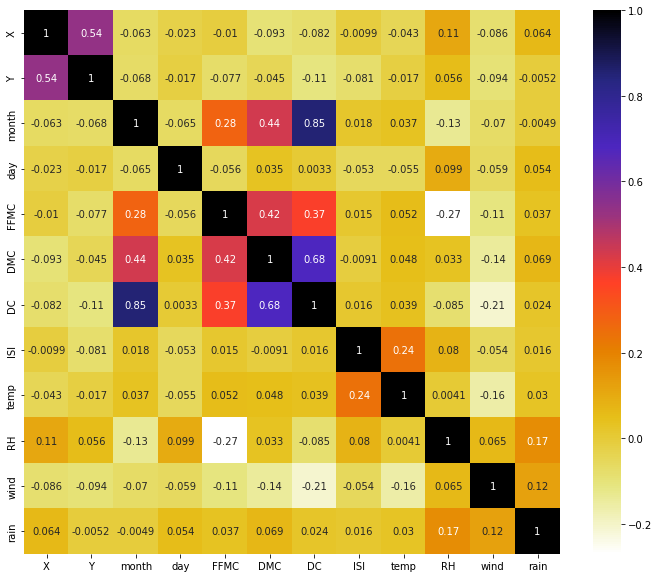

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r )
plt.show()

In [ ]:
X_test.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-1.128728,-1.829806,0.213958,-1.077701,0.282682,0.709409,0.455505,-0.640952,0.457944,0.829833,-0.482325,-0.084771
1,0.588777,0.528435,0.213958,0.878188,-0.098499,-0.171221,0.318845,0.582187,1.587158,1.018652,1.064065,-0.084771
2,-0.269976,1.314516,0.649151,-0.099757,0.603677,-0.424185,0.564030,0.217487,0.262831,-0.051320,-0.482325,-0.084771
3,-0.699352,-0.257645,0.649151,0.389215,0.523428,0.529172,0.679388,-0.053898,-0.298118,0.389257,-0.195956,-0.084771
4,1.018153,-0.257645,0.649151,-0.588729,-0.118561,-0.392564,0.767011,-0.733052,0.677446,0.892773,0.319507,-0.084771


In [ ]:
Y_train.head()

323    2.18
191    8.68
14     0.00
411    4.62
492    0.00
Name: area, dtype: float64

In [ ]:
Y_test.head()

270     0.52
90      0.00
133     0.00
221    35.88
224    37.71
Name: area, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg_model=LinearRegression()
linear_reg_model.fit(X_train,Y_train)

print("Performance of Linear Regression R^2 metric {:.5f}".format(linear_reg_model.score(X_train,Y_train)))

Performance of Linear Regression R^2 metric 0.01373


In [ ]:
#Random Forest Regressor
regr = RandomForestRegressor(max_depth=300, random_state=100, n_estimators=300)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
#print("MSE =", mse(Y_pred, Y_test))
#print("MAE =", mae(Y_pred, Y_test))
print("R2 Score =", r2_score(Y_pred, Y_test)) 

R2 Score = -61.64628491399662


In [ ]:
X_train,X_test,Y_train,Y_test=preprocessing(df,task='Classification')

In [ ]:
Y_train

323    1
191    1
14     0
411    1
492    0
      ..
129    0
144    1
72     0
235    1
37     0
Name: area, Length: 299, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model=LogisticRegression()
log_reg_model.fit(X_train,Y_train)

print('Logistic Regression Accuracy, {:.5f}%'.format(log_reg_model.score(X_test,Y_test)*100))

Logistic Regression Accuracy, 53.21101%


In [ ]:
nn_classifier_model=MLPClassifier(activation='relu',hidden_layer_sizes=(16,16),n_iter_no_change=100,solver='adam')#rectified linear unit
nn_classifier_model.fit(X_train,Y_train)
print('MLP Classifier Accuracy, {:.5f}%'.format(nn_classifier_model.score(X_test,Y_test)*100))

MLP Classifier Accuracy, 62.38532%


In [ ]:
nn_classifier_model.predict(X_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
np.array(Y_test)

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
Y_pred=nn_classifier_model.predict(X_test)
print('MLP Classifier Accuracy, {:.5f}%'.format(np.mean(Y_pred==Y_test)*100))

MLP Classifier Accuracy, 62.38532%
